In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [2]:
diesel = pd.read_csv('Diesel Price History - Hoja 1.csv')


##### Análisis de la información y limpieza

In [3]:
diesel.head()

,Fecha,Diesel mxn/lt
0,01/01/2018,17.38
1,01/02/2018,17.94
2,01/03/2018,18.59
3,01/04/2018,18.70
4,01/05/2018,18.89


In [4]:
diesel['Fecha']= diesel['Fecha'].str.replace('/', '-')

In [5]:
diesel['Diesel mxn/lt'] = diesel['Diesel mxn/lt'].astype('float64')

In [6]:
diesel['Fecha'] = pd.to_datetime(diesel['Fecha'])

In [7]:
diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          62 non-null     datetime64[ns]
 1   Diesel mxn/lt  62 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [8]:
diesel = diesel.set_index('Fecha')

In [9]:
diesel.head()

,Diesel mxn/lt
Fecha,
2018-01-01,17.38
2018-01-02,17.94
2018-01-03,18.59
2018-01-04,18.70
2018-01-05,18.89


In [10]:
diesel.tail()

,Diesel mxn/lt
Fecha,
2022-01-10,23.31
2022-01-11,23.17
2022-01-12,23.02
2023-01-01,22.95
2023-01-02,23.28


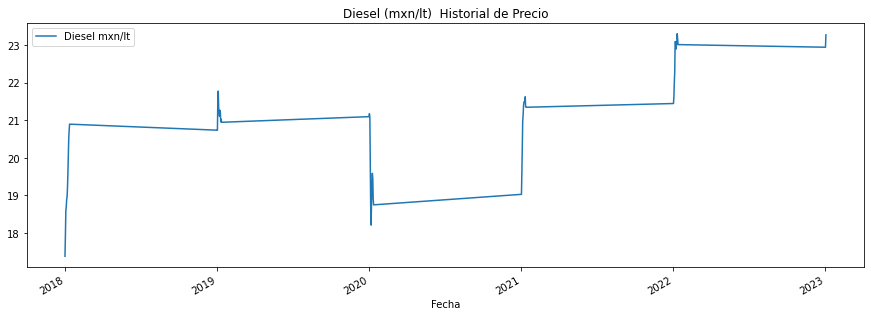

In [11]:
diesel.plot(figsize=(15, 5),title='Diesel (mxn/lt)  Historial de Precio')
plt.show()

In [12]:
diesel1=diesel.copy()

##### Entrenamiento de los datos

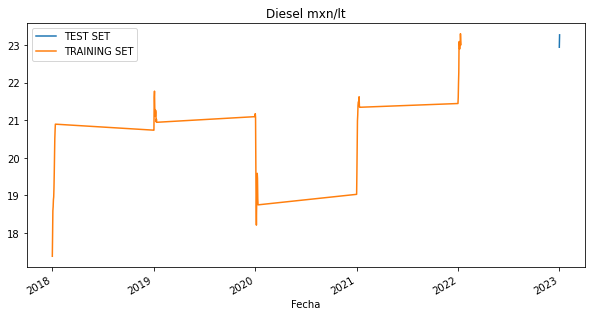

In [13]:
split_date = '1-Jul-2022'
diesel1_train = diesel1.loc[diesel1.index <= split_date].copy()
diesel1_test = diesel1.loc[diesel1.index > split_date].copy()

# Plot train and test so you can see where we have split
diesel1_test \
    .rename(columns={'Diesel mxn/lt': 'TEST SET'}) \
    .join(diesel1_train.rename(columns={'Diesel mxn/lt': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(10, 5), title='Diesel mxn/lt', ms=1)
plt.show()

In [14]:
diesel1_train_prophet = diesel1_train.reset_index() \
    .rename(columns={'Fecha':'ds',
                     'Diesel mxn/lt':'y'})

In [15]:
diesel1_train_prophet

,ds,y
0,2018-01-01,17.38
1,2018-01-02,17.94
2,2018-01-03,18.59
3,2018-01-04,18.70
4,2018-01-05,18.89
5,2018-01-06,18.96
6,2018-01-07,19.21
7,2018-01-08,19.60
8,2018-01-09,20.07
9,2018-01-10,20.52


In [16]:
model = Prophet()
model.fit(diesel1_train_prophet)

16:07:29 - cmdstanpy - INFO - Chain [1] start processing
16:07:29 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
diesel1_test_prophet = diesel1_test.reset_index() \
    .rename(columns={'Fecha':'ds',
                     'Diesel mxn/lt':'y'})

diesel1_test_fcst = model.predict(diesel1_test_prophet)

In [18]:
diesel1_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,9.103775,22.312855,24.099398,9.103775,9.103775,14.109036,14.109036,14.109036,-0.352233,-0.352233,-0.352233,14.461269,14.461269,14.461269,0.0,0.0,0.0,23.212811
1,2023-01-02,9.107727,22.264191,24.144339,9.107727,9.107727,14.112562,14.112562,14.112562,-0.330697,-0.330697,-0.330697,14.443258,14.443258,14.443258,0.0,0.0,0.0,23.220289


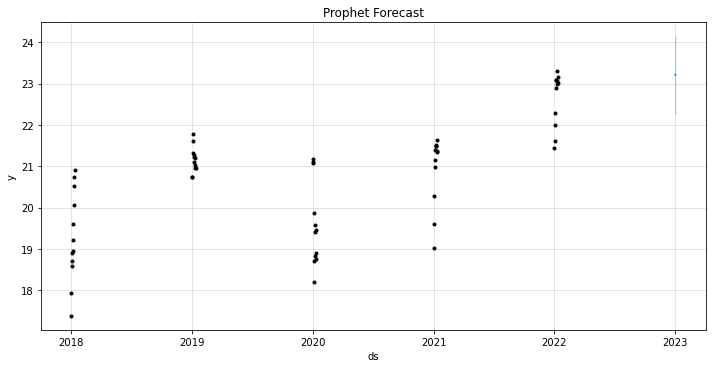

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(diesel1_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

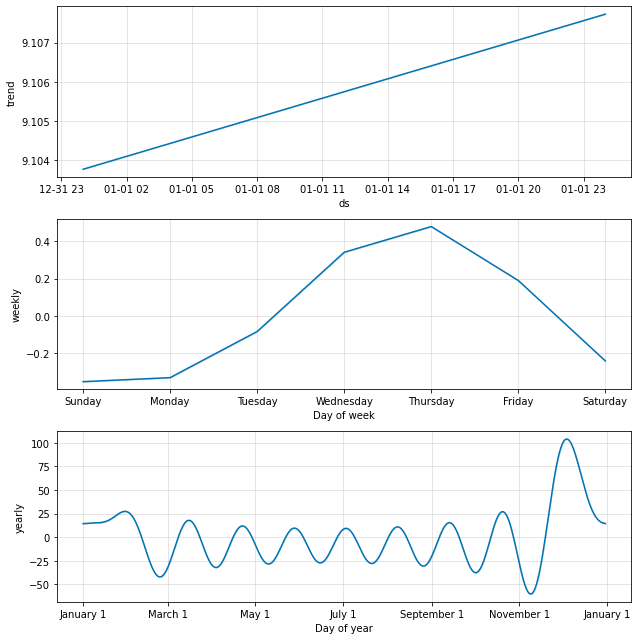

In [20]:
fig = model.plot_components(diesel1_test_fcst)
plt.show()

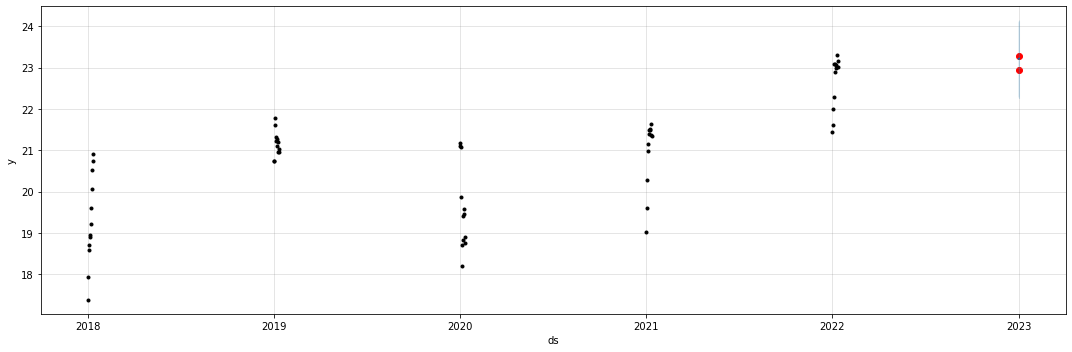

In [21]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(diesel1_test.index, diesel1_test['Diesel mxn/lt'], color='r')
fig = model.plot(diesel1_test_fcst, ax=ax)

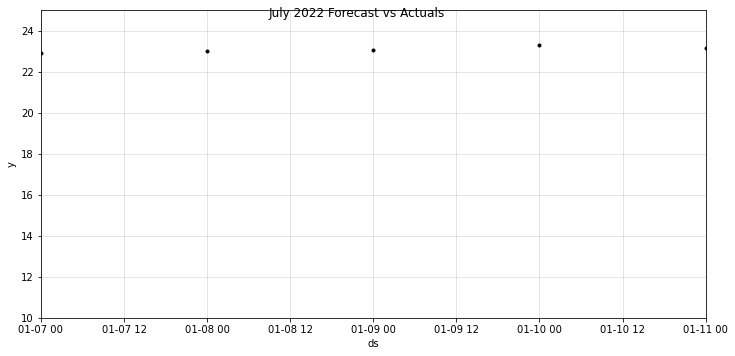

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(diesel1_test.index, diesel1_test['Diesel mxn/lt'], color='r')
fig = model.plot(diesel1_test_fcst, ax=ax)
ax.set_xbound(lower='01-07-2022',
              upper='01-11-2022')
ax.set_ylim(10, 25)
plot = plt.suptitle('July 2022 Forecast vs Actuals')

In [23]:
np.sqrt(mean_squared_error(y_true=diesel1_test['Diesel mxn/lt'],
                   y_pred=diesel1_test_fcst['yhat']))

0.190571339675613

In [24]:
mean_absolute_error(y_true=diesel1_test['Diesel mxn/lt'],
                   y_pred=diesel1_test_fcst['yhat'])

0.16126076534341394

In [25]:
# Calculates MAPE given y_true and y_pred
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mean_absolute_percentage_error(y_true=diesel1_test['Diesel mxn/lt'],
                   y_pred=diesel1_test_fcst['yhat'])

0.7008172442236821

In [27]:
future = model.make_future_dataframe(periods=365, include_history=False)

In [28]:
forecast_diesel = model.predict(future)

In [29]:
forecast_diesel.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2023-01-08,9.131441,22.805607,24.870205,8.704710,9.528959,14.712309,14.712309,14.712309,-0.352233,-0.352233,-0.352233,15.064543,15.064543,15.064543,0.0,0.0,0.0,23.843751
361,2023-01-09,9.135394,22.931920,25.002979,8.706780,9.534577,14.800643,14.800643,14.800643,-0.330697,-0.330697,-0.330697,15.131339,15.131339,15.131339,0.0,0.0,0.0,23.936036
362,2023-01-10,9.139346,23.314632,25.210909,8.708855,9.539159,15.100277,15.100277,15.100277,-0.083750,-0.083750,-0.083750,15.184027,15.184027,15.184027,0.0,0.0,0.0,24.239623
363,2023-01-11,9.143298,23.683957,25.719903,8.710930,9.543622,15.575320,15.575320,15.575320,0.340607,0.340607,0.340607,15.234713,15.234713,15.234713,0.0,0.0,0.0,24.718618
364,2023-01-12,9.147251,23.868618,25.933070,8.713004,9.548252,15.777788,15.777788,15.777788,0.478245,0.478245,0.478245,15.299543,15.299543,15.299543,0.0,0.0,0.0,24.925038


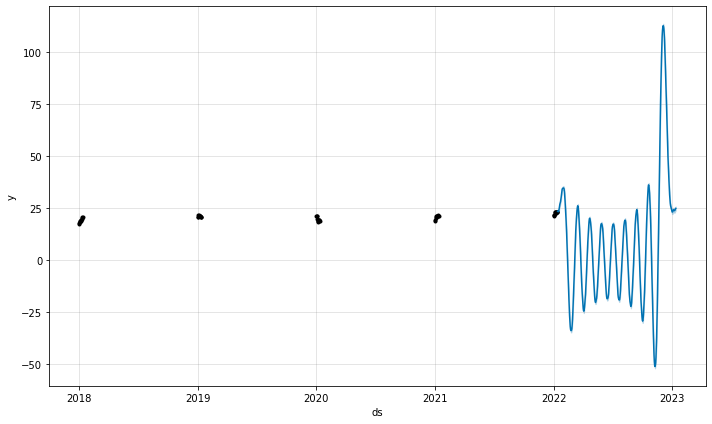

In [30]:
fig1 = model.plot(forecast_diesel)

In [31]:
filename = 'forecast_diesel.csv'
forecast_diesel.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: forecast_diesel.csv
